### Imbalanced Data - Under Sampling

Credit Card Fraudulent Dataset

In [1]:
dataset_url = "https://github.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/raw/refs/heads/master/creditcard.csv"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(dataset_url, sep=",")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values

In [8]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

##### Imbalanced Data

In [10]:
cols = df.columns.tolist()

In [11]:
X_cols = [col for col in cols if col not in ["Class"]]
target = "Class"
np.random.RandomState(69)
X = df[X_cols]
y = df[target]

In [12]:
X.shape

(284807, 30)

In [13]:
y.shape

(284807,)

##### EDA

In [14]:
target_count = df[target].value_counts(sort=True)
target_count

Class
0    284315
1       492
Name: count, dtype: int64

In [18]:
LABELS = ["Normal", "Fraud"]

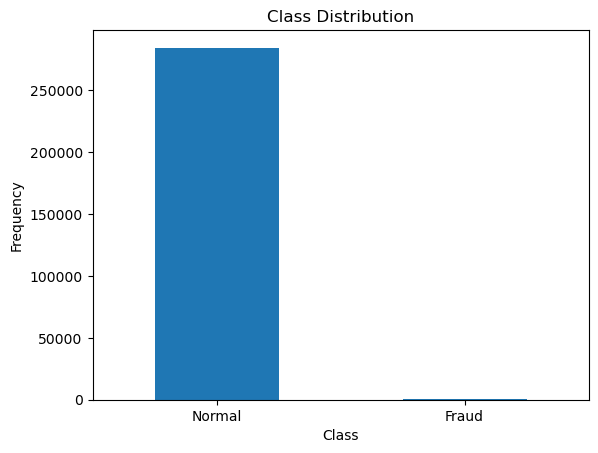

In [19]:
target_count.plot(kind="bar", rot=0)
plt.title("Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [20]:
fraud = df[df[target]==1]
normal = df[df[target]==0]

In [21]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


##### IMBLearn NearMiss

In [22]:
from imblearn.under_sampling import NearMiss

In [24]:
nm = NearMiss()

In [25]:
X_res, y_res = nm.fit_resample(X,y)

In [30]:
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,...,-0.057911,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,...,0.457988,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,...,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79


In [33]:
y_res.unique()

array([0, 1], dtype=int64)

In [26]:
print(X_res.shape, y_res.shape)

(984, 30) (984,)


In [27]:
from collections import Counter

In [28]:
print(f'Original datset shape {Counter(y)}')
print(f'Resampled dataset shape {Counter(y_res)}')

Original datset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [42]:
y_df_res = pd.DataFrame(np.array(y_res).reshape(-1,1),columns=[target])

In [45]:
under_sampled_df = pd.concat([X_res, y_df_res], axis=1)

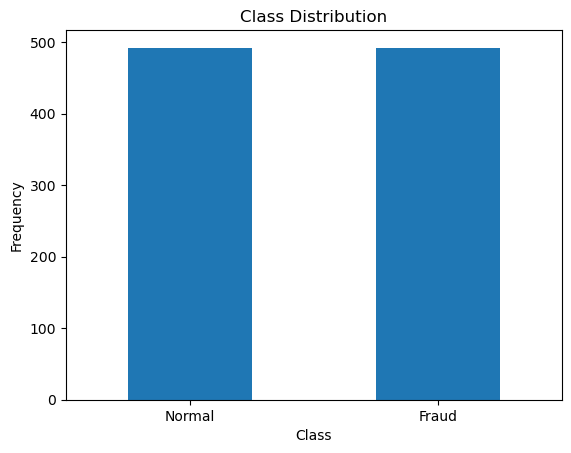

In [46]:
under_sampled_df[target].value_counts().plot(kind="bar", rot=0)
plt.title("Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

### Imbalanced Data - Over Sampling

##### IMBLearn SMOTETomek

In [51]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [66]:
smk = SMOTETomek(random_state=69, n_jobs=-1, sampling_strategy=1)

In [53]:
X_res, y_res = smk.fit_resample(X,y)

C:\Users\venka\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [54]:
print(X_res.shape, y_res.shape)

(567590, 30) (567590,)


In [55]:
print(f'Original dataset shape {Counter(y)}')
print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283795, 1: 283795})


In [59]:
os = RandomOverSampler(sampling_strategy=0.5, random_state=69)

In [60]:
X_res_os, y_res_os = os.fit_resample(X,y)

In [61]:
print(X_res_os.shape, y_res_os.shape)

(426472, 30) (426472,)


In [62]:
y_df_res = pd.DataFrame(np.array(y_res_os).reshape(-1,1),columns=[target])

In [64]:
over_sampled_df = pd.concat([X_res_os, y_df_res], axis=1)

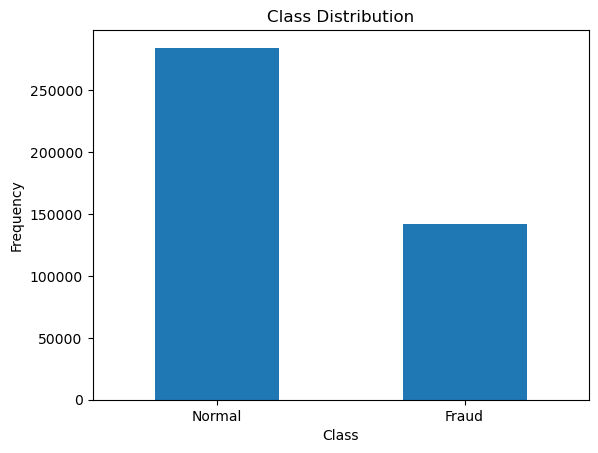

In [65]:
over_sampled_df[target].value_counts().plot(kind="bar", rot=0)
plt.title("Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Sampling Strategy is the ratio of the minority class

let Normal rows = 500, Fraud rows = 100

if sampling_strategy = 0.5, then the overSampled rows should add up to get 0.5 of majority rows

That means, 0.5 * 500 = 250

Thus 150 rows will be oversampled such that total Fraud classes will be 250

After OverSampling

Normal rows = 500, Fraud rows = 250